<img src='./SFO_Logo.jpg'>

# <center><font color='Black'><h1>SFO Passenger Traffic Analysis</h1></font></center>

<font color='blue'><h2>Context</h2></font>
<p>
SFO is the IATA code for San Francisco airport. SFO is one of the major hubs on the west coast of USA. This dataset is regarding passenger traffic both domestic and international. Data set was downloaded from Kaggle, it is updated quartely.</p>
<p>
The objective of this code is to do visualize this passenger data. 
</p>

<font color='blue'><h2>Data - Columns</h2></font>
<ol>
<li>Activity period: Date, Month and Year</li>
<li>Operating Airline: Airline the provided service</li>
<li>Operating Airline IATA Code: IATA Code for the Airline</li>
<li>Published Airline: Airline that carries the passengers, it could be partner operating airline</li>
<li>Published Airline IATA Code: IATA code for published airline</li>
<li>GEO Summary: Whether the Airline is flying domestic or international</li>
<li>GEO Region: Region of the world where the Airline is going or coming from</li>
<li>Activity Type Code: Boarding, De-boarded or in transit</li>
<li>Price Category: Fare category - Low cost, regular</li>
<li>Terminal: Terminal from which the Airline operated</li>
<li>Boarding Area: Boarding location</li>
<li>Passenger Count: Number of passengers during the Activity period</li>
</ol>

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import sfo_funcs as sfuncs

# Set this to view all the rows in data frame
pd.options.display.max_rows = 8000

<font color= 'blue'><h3>Data Extraction and Summary
</h3></font>

In [2]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df_orig = df.copy()

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
print(df.shape)
print(df.isnull().sum())

(18885, 12)
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64


<font color= 'blue'><h3>Convert the Actiivity Period to date time. Also extract year and month from activity period and add as new features (to be used later).
</h3></font>

In [6]:
df.loc[:,"Activity Period"] = pd.to_datetime(df.loc[:,"Activity Period"].astype(str), format="%Y%m")
df.loc[:,"Year"] = df["Activity Period"].dt.year
df.loc[:,"Month"] = df["Activity Period"].dt.month
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


In [7]:
# Get the activity period
sfuncs.printActivity(df)

Begin   2005-07-01 
End     2018-06-01 
Days    4718
Months  674.0


<font color= 'blue'><h3>Now group the airlines by the yearly passengers
</h3></font>

In [8]:
airline_year = sfuncs.joinUnitedAirlines(df)
airline_year

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Operating Airline,,,,,,,,,,,,,,
ABC Aerolineas S.A. de C.V. dba Interjet,0,0,0,0,0,0,0,0,0,0,0,0,0,15585
ATA Airlines,277540,105796,1362,66,0,0,0,0,0,0,0,0,0,0
Aer Lingus,0,0,14709,104897,65033,0,0,0,0,86838,134582,142382,153383,75867
Aeromexico,0,0,524,0,60533,77648,80171,74552,118783,243923,263919,277196,326365,149332
Air Berlin,0,0,0,0,0,24119,29205,30223,0,0,0,52484,99124,0
Air Canada,308746,603478,625235,559857,545460,561517,579553,561874,613528,731007,827660,892548,928932,465499
Air Canada Jazz,1063,3056,0,0,0,0,0,0,0,0,0,0,0,0
Air China,54421,117464,156195,147013,122027,157161,169458,171633,189905,184737,196393,249193,235938,108796
Air France,119337,235893,231093,242174,245882,259807,297633,321072,320853,316303,345660,356800,352263,156268


<font color= 'blue'><h3>Drop Airlines with yearly passengers less than 10,000
</h3></font>

In [9]:
dropped = airline_year[airline_year.sum(axis = 1) < 10000]

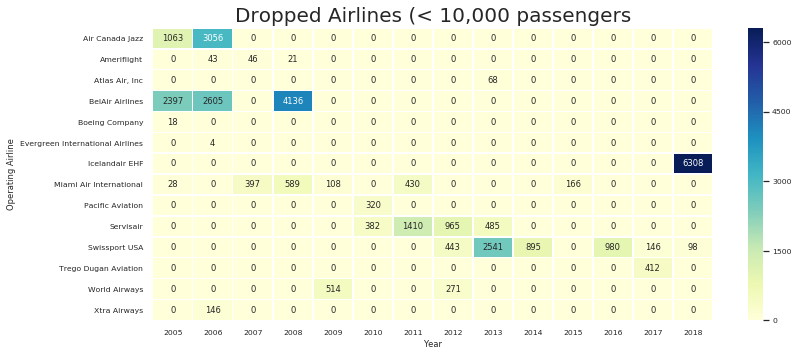

In [10]:
sfuncs.plotSnsDropped(dropped, 'Dropped Airlines (< 10,000 passengers')

In [11]:
# drop all airlines with less than 10,000 passengers
airline_year = airline_year.drop(dropped.index, axis = 0)
airline_year

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Operating Airline,,,,,,,,,,,,,,
ABC Aerolineas S.A. de C.V. dba Interjet,0,0,0,0,0,0,0,0,0,0,0,0,0,15585
ATA Airlines,277540,105796,1362,66,0,0,0,0,0,0,0,0,0,0
Aer Lingus,0,0,14709,104897,65033,0,0,0,0,86838,134582,142382,153383,75867
Aeromexico,0,0,524,0,60533,77648,80171,74552,118783,243923,263919,277196,326365,149332
Air Berlin,0,0,0,0,0,24119,29205,30223,0,0,0,52484,99124,0
Air Canada,308746,603478,625235,559857,545460,561517,579553,561874,613528,731007,827660,892548,928932,465499
Air China,54421,117464,156195,147013,122027,157161,169458,171633,189905,184737,196393,249193,235938,108796
Air France,119337,235893,231093,242174,245882,259807,297633,321072,320853,316303,345660,356800,352263,156268
Air India Limited,0,0,0,0,0,0,0,0,0,0,5832,73799,131047,82821


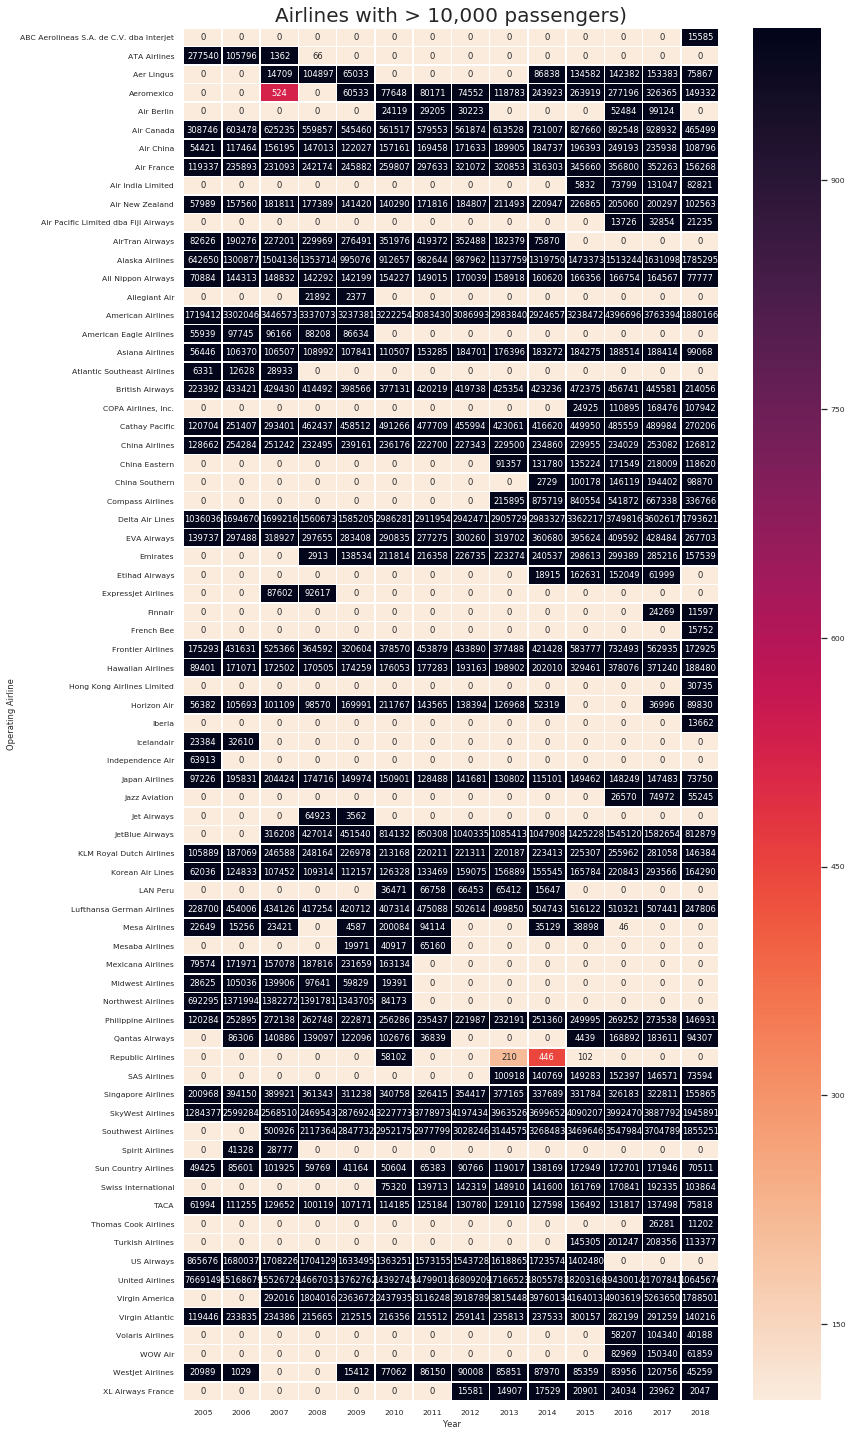

In [12]:
sfuncs.plotSnsMajorAirlines(airline_year, 'Airlines with > 10,000 passengers)')

<font color= 'blue'><h3>Top 10 Airlines based on passenger count</h3></font>

In [13]:
airline_mean = airline_year.mean(axis = 1)
airline_top = airline_mean.nlargest(10)
airline_top = pd.DataFrame(airline_top, columns =['Total'])
airline_top.Total = airline_top.Total.apply(np.int64)
# format with comma separator
airline_top['Total'] = airline_top['Total'].apply("{:,}".format)
airline_top

,Total
Operating Airline,
United Airlines,"15,571,737"
SkyWest Airlines,"3,184,454"
American Airlines,"3,115,884"
Virgin America,"2,703,137"
Delta Air Lines,"2,486,702"
Southwest Airlines,"2,386,783"
Alaska Airlines,"1,252,873"
US Airways,"1,201,186"
JetBlue Airways,"814,195"


<font color= 'green'><h2>TOP 5 Summary</h2></font>
<font color= 'black'><h3>United Airlines</h3></font>
<p>
United Airlines in one of biggest carrier based in US. SFO is a one of the major hubs for United, it has several international and domestic connections based off SFO.United is based in Chicage and Chicago O'Hare is its biggest hub.
</p>
<font color= 'black'><h3>Skywest Airlines</h3></font>
<p>
Skywest is US based regional airline that has number of hubs in US. It connects number of passengers each month to 257 destinations within US. It partners with United, Delta, American and Alaskan Airlines.
</p>
<font color= 'black'><h3>American Airlines</h3></font>
<p>
American is one of biggest airlines in the world based in Fort Worth, Texas. Eventhough SFO is not one of its hub, it is still 3rd in carrying passengers.
</p>
<font color= 'black'><h3>Virgin Airlines</h3></font>
<p>
Virgin Airlines is US airlines based in Burlingame, California (a city in San Francisco Bay Area). It is a regional airlines with flights on west coast. Its hubs are SFO and LAX (Los Angles). <br>
Since 2018 Virgin Airlines was purchased by Alaskan Airlines.
</p>
<font color= 'black'><h3>Delta Airlines</h3></font>
<p>
Delta Airlines is US airlines based in Atlanta, Georgia. It is second largest airlines in the world. It provides domestic and international connections from SFO.
</p>


<font color= 'blue'><h3>Group the airlines by Month and Year to see yearly peek period</h3></font>

In [14]:
airline_month_year = sfuncs.getByMonthYear(df)
airline_month_year

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Jan,0.0,2449.0,2507.0,2670.0,2645.0,2785.0,2884.0,3212.0,3205.0,3433.0,3550.0,3749.0,3898.0,4190.0
Feb,0.0,2223.0,2305.0,2596.0,2360.0,2515.0,2611.0,2998.0,2966.0,3078.0,3248.0,3544.0,3481.0,3882.0
Mar,0.0,2709.0,2820.0,3127.0,2926.0,3106.0,3129.0,3472.0,3593.0,3766.0,4002.0,4138.0,4335.0,4674.0
Apr,0.0,2773.0,2869.0,3029.0,3025.0,3139.0,3201.0,3563.0,3604.0,3882.0,4022.0,4173.0,4426.0,4713.0
May,0.0,2829.0,3057.0,3306.0,3177.0,3380.0,3548.0,3821.0,3933.0,4147.0,4361.0,4574.0,4698.0,5026.0
Jun,0.0,3071.0,3264.0,3454.0,3420.0,3613.0,3766.0,4107.0,4147.0,4322.0,4559.0,4922.0,5134.0,5427.0
Jul,3226.0,3228.0,3382.0,3604.0,3650.0,3766.0,3936.0,4284.0,4176.0,4499.0,4801.0,5169.0,5497.0,0.0
Aug,3196.0,3144.0,3436.0,3612.0,3651.0,3772.0,3918.0,4356.0,4347.0,4525.0,4797.0,5111.0,5517.0,0.0
Sep,2741.0,2720.0,2958.0,3005.0,3192.0,3356.0,3565.0,3819.0,3781.0,3919.0,4201.0,4544.0,4736.0,0.0
Oct,2771.0,2835.0,3129.0,3124.0,3249.0,3490.0,3602.0,3845.0,3911.0,4059.0,4375.0,4572.0,4869.0,0.0


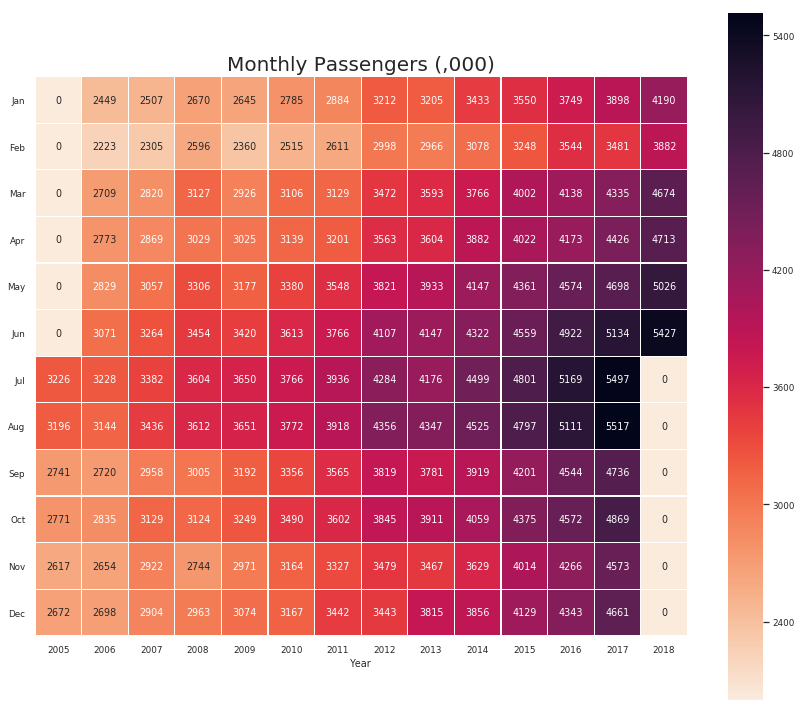

In [15]:

sfuncs.plotSnsMonthYear(airline_month_year, 'Monthly Passengers (,000)')

<font color= 'green'><h3>The months from June to August are the heaviest in terms of passenger traffic. This is time when most vacations are taken. Also San Francisco is one of most popular tourist destinations within US.  </h3></font>

<font color= 'blue'><h3>Group by Geographic region on yearly basis</h3></font>

In [16]:
airline_geo = sfuncs.getGeoRegionYearly(df)
airline_geo

GEO Region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US,Total
Year,,,,,,,,,,
2005,1955732,164991,589467,61994,1147195,305087,0,0,12997567,17222033
2006,3978377,453420,1194203,111255,2163664,686118,0,0,24745933,33332970
2007,4207750,513077,1289020,129652,2294460,636946,0,0,26483177,35554082
2008,4199816,489532,1239889,100119,2359832,641005,2913,0,28201572,37234678
2009,3689124,478969,1158107,107171,2187690,599886,138534,0,28979461,37338942
2010,4017794,455466,1301702,114185,2163987,595388,211814,36471,30357192,39253999
2011,3944720,416924,1284852,125184,2415764,585198,216358,66758,31872028,40927786
2012,4119766,396782,1257499,130780,2514619,850434,226735,66453,34836817,44399885
2013,4054984,431219,1286553,129110,2719687,834049,223274,65412,35201472,44945760


In [17]:
# Add Geographical region shares as new features.
for col in airline_geo.columns[:-1]:
    airline_geo["Share " + str(col)]=airline_geo[col]/airline_geo["Total"]
airline_geo

GEO Region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US,Total,Share Asia,Share Australia / Oceania,Share Canada,Share Central America,Share Europe,Share Mexico,Share Middle East,Share South America,Share US
Year,,,,,,,,,,,,,,,,,,,
2005,1955732,164991,589467,61994,1147195,305087,0,0,12997567,17222033,0.113560,0.009580,0.034227,0.003600,0.066612,0.017715,0.000000,0.000000,0.754706
2006,3978377,453420,1194203,111255,2163664,686118,0,0,24745933,33332970,0.119353,0.013603,0.035826,0.003338,0.064911,0.020584,0.000000,0.000000,0.742386
2007,4207750,513077,1289020,129652,2294460,636946,0,0,26483177,35554082,0.118348,0.014431,0.036255,0.003647,0.064534,0.017915,0.000000,0.000000,0.744870
2008,4199816,489532,1239889,100119,2359832,641005,2913,0,28201572,37234678,0.112793,0.013147,0.033299,0.002689,0.063377,0.017215,0.000078,0.000000,0.757401
2009,3689124,478969,1158107,107171,2187690,599886,138534,0,28979461,37338942,0.098801,0.012828,0.031016,0.002870,0.058590,0.016066,0.003710,0.000000,0.776119
2010,4017794,455466,1301702,114185,2163987,595388,211814,36471,30357192,39253999,0.102354,0.011603,0.033161,0.002909,0.055128,0.015168,0.005396,0.000929,0.773353
2011,3944720,416924,1284852,125184,2415764,585198,216358,66758,31872028,40927786,0.096382,0.010187,0.031393,0.003059,0.059025,0.014298,0.005286,0.001631,0.778738
2012,4119766,396782,1257499,130780,2514619,850434,226735,66453,34836817,44399885,0.092788,0.008937,0.028322,0.002946,0.056636,0.019154,0.005107,0.001497,0.784615
2013,4054984,431219,1286553,129110,2719687,834049,223274,65412,35201472,44945760,0.090220,0.009594,0.028625,0.002873,0.060510,0.018557,0.004968,0.001455,0.783199


In [18]:
geo_shares = airline_geo.iloc[:, -9:]
geo_shares

GEO Region,Share Asia,Share Australia / Oceania,Share Canada,Share Central America,Share Europe,Share Mexico,Share Middle East,Share South America,Share US
Year,,,,,,,,,
2005,0.113560,0.009580,0.034227,0.003600,0.066612,0.017715,0.000000,0.000000,0.754706
2006,0.119353,0.013603,0.035826,0.003338,0.064911,0.020584,0.000000,0.000000,0.742386
2007,0.118348,0.014431,0.036255,0.003647,0.064534,0.017915,0.000000,0.000000,0.744870
2008,0.112793,0.013147,0.033299,0.002689,0.063377,0.017215,0.000078,0.000000,0.757401
2009,0.098801,0.012828,0.031016,0.002870,0.058590,0.016066,0.003710,0.000000,0.776119
2010,0.102354,0.011603,0.033161,0.002909,0.055128,0.015168,0.005396,0.000929,0.773353
2011,0.096382,0.010187,0.031393,0.003059,0.059025,0.014298,0.005286,0.001631,0.778738
2012,0.092788,0.008937,0.028322,0.002946,0.056636,0.019154,0.005107,0.001497,0.784615
2013,0.090220,0.009594,0.028625,0.002873,0.060510,0.018557,0.004968,0.001455,0.783199


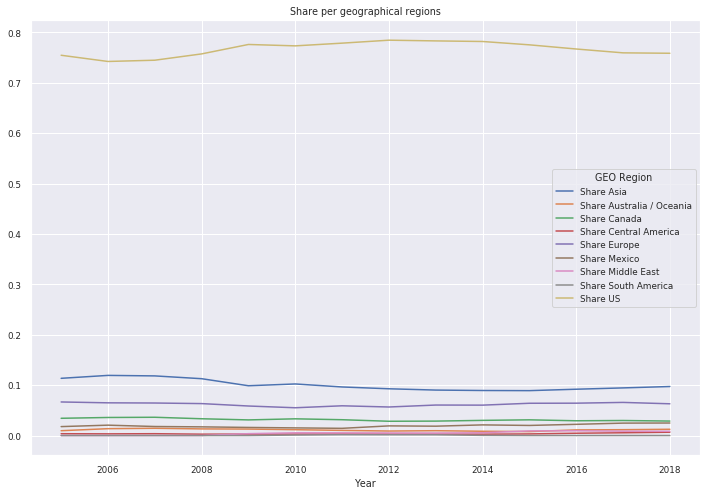

In [19]:
geo_shares.plot(figsize = (12,8), title = "Share per geographical regions")
plt.show()

<font color= 'green'><h3>Off course the domestic traffic (withiin US) will be most portion of passenger traffic because SFO is one of the biggest airport in the Bay Area. There are a lot of toursits, business (silicon valley).  </h3></font>

In [20]:
geo_shares = geo_shares.iloc[:, 0:8]
geo_shares


GEO Region,Share Asia,Share Australia / Oceania,Share Canada,Share Central America,Share Europe,Share Mexico,Share Middle East,Share South America
Year,,,,,,,,
2005,0.113560,0.009580,0.034227,0.003600,0.066612,0.017715,0.000000,0.000000
2006,0.119353,0.013603,0.035826,0.003338,0.064911,0.020584,0.000000,0.000000
2007,0.118348,0.014431,0.036255,0.003647,0.064534,0.017915,0.000000,0.000000
2008,0.112793,0.013147,0.033299,0.002689,0.063377,0.017215,0.000078,0.000000
2009,0.098801,0.012828,0.031016,0.002870,0.058590,0.016066,0.003710,0.000000
2010,0.102354,0.011603,0.033161,0.002909,0.055128,0.015168,0.005396,0.000929
2011,0.096382,0.010187,0.031393,0.003059,0.059025,0.014298,0.005286,0.001631
2012,0.092788,0.008937,0.028322,0.002946,0.056636,0.019154,0.005107,0.001497
2013,0.090220,0.009594,0.028625,0.002873,0.060510,0.018557,0.004968,0.001455


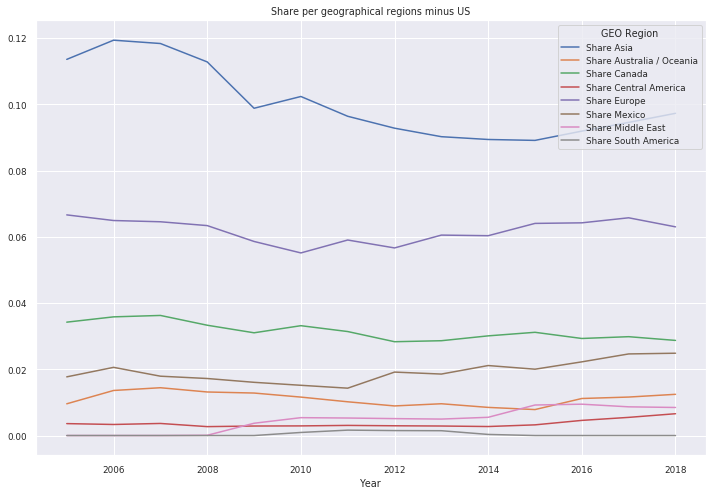

In [21]:
geo_shares = geo_shares.iloc[:, 0:8]
geo_shares
geo_shares.plot(figsize = (12,8), title = "Share per geographical regions minus US")
plt.show()

<font color= 'green'><h3>The traffic to Asia is significant amongst other geographical regions because SFO is one of major international hub for traffic going to Asia.</h3></font>

<font color= 'blue'><h3>Group by Yearly Passenger Count</h3></font>

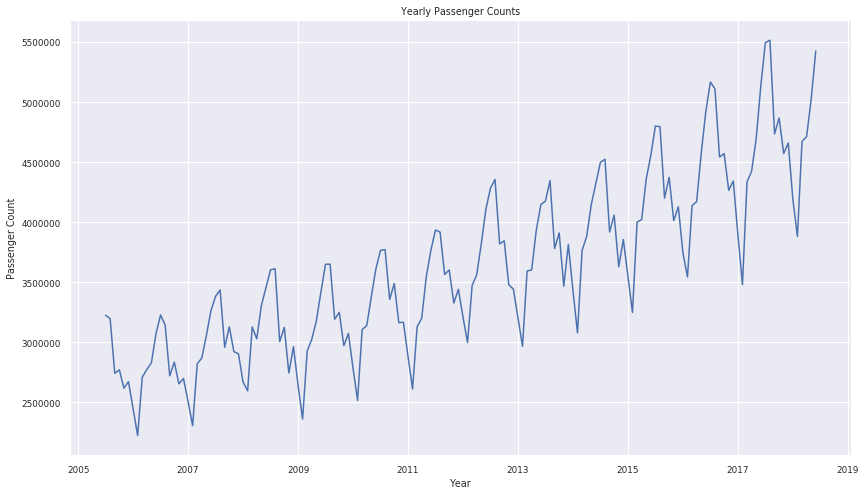

In [22]:
traffic = df.groupby(["Activity Period"])["Passenger Count"].sum()
a = traffic.plot(figsize=(14,8))
a.set_xlabel("Year")
a.set_ylabel("Passenger Count")
plt.title("Yearly Passenger Counts")
plt.grid(True)
plt.show()

<font color= 'blue'><h3>Domestic v/s International </h3></font>

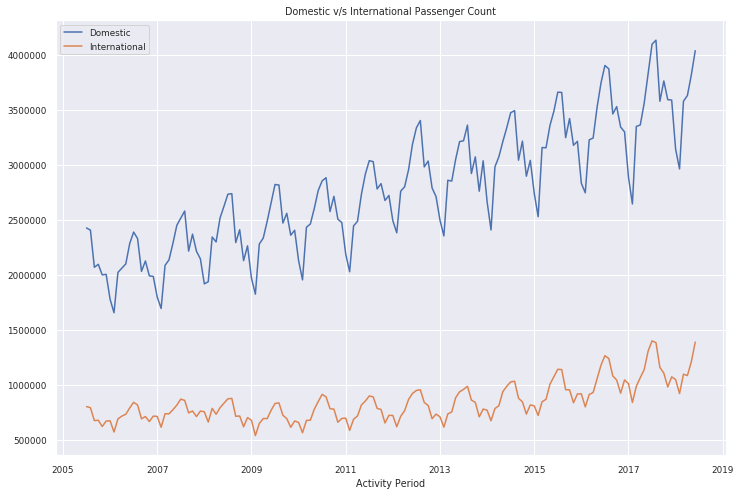

In [23]:
domestic = df[df["GEO Summary"] == "Domestic"].groupby("Activity Period")["Passenger Count"].sum()
international = df[df["GEO Summary"] == "International"].groupby("Activity Period")["Passenger Count"].sum()
traffic_both = pd.concat([domestic, international], axis = 1)
traffic_both.columns = ["Domestic", "International"]
plt.figsize = (12,8)
traffic_both.plot(figsize=(12,8), title = "Domestic v/s International Passenger Count")
plt.show()

In [24]:
# percentage 12 month rolling period
r_dom = domestic.pct_change(12).mul(100)
r_int = international.pct_change(12).mul(100)
mean_dom = r_dom.mean()
mean_int = r_int.mean()
mean_dom, mean_int

(4.935636578921274, 4.395562259856955)

In [25]:
rolling = pd.concat([r_dom, r_int], axis = 1)
rolling.columns = ["Domestic", "International"]


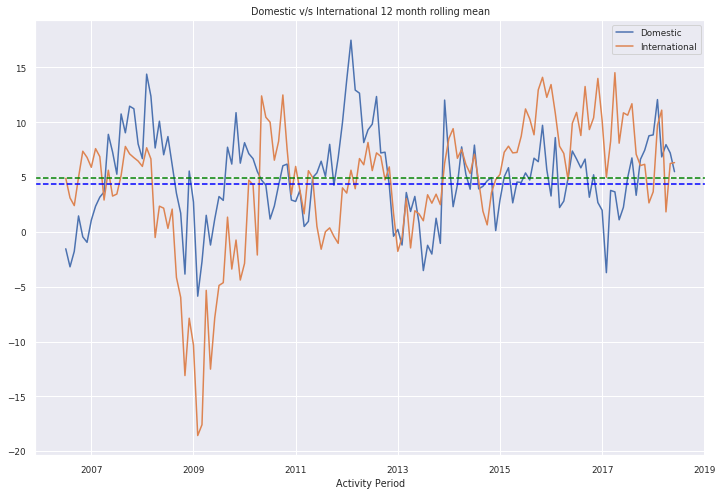

In [26]:
rolling.plot(figsize=(12,8), title = "Domestic v/s International 12 month rolling mean")
plt.axhline(mean_dom, c="green", linestyle="--")
plt.axhline(mean_int, c="blue", linestyle="--")
plt.show()